# Mini-Movielens EDA

Writer: E.W

Date: 2024/05/29

In [1]:
%load_ext lab_black

## Read Data

In [2]:
import numpy as np
import pandas as pd

rating_df = pd.read_csv("ml-latest-small/ratings.csv")
movie_df = pd.read_csv("ml-latest-small/movies.csv")

In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Check Missing Values

In [7]:
movie_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [8]:
rating_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [9]:
def get_genres(df):
    unique_genres = set()
    for genres in df["genres"]:
        for genre in genres.split("|"):
            unique_genres.add(genre)
    return sorted(unique_genres)


movie_genres = get_genres(movie_df)
movie_genres

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [10]:
no_genre_filter = movie_genres[0]
movie_no_genre_df = movie_df[
    movie_df["genres"].apply(lambda x: no_genre_filter in x.split("|"))
]
movie_no_genre_df

,movieId,title,genres
8517,114335,La cravate (1957),(no genres listed)
8684,122888,Ben-hur (2016),(no genres listed)
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed)
8782,129250,Superfast! (2015),(no genres listed)
8836,132084,Let It Be Me (1995),(no genres listed)
8902,134861,Trevor Noah: African American (2013),(no genres listed)
9033,141131,Guardians (2016),(no genres listed)
9053,141866,Green Room (2015),(no genres listed)
9070,142456,The Brand New Testament (2015),(no genres listed)
9091,143410,Hyena Road,(no genres listed)


In [11]:
movie_df.drop(movie_no_genre_df.index, inplace=True)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9708 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9708 non-null   int64 
 1   title    9708 non-null   object
 2   genres   9708 non-null   object
dtypes: int64(1), object(2)
memory usage: 303.4+ KB


## Check Duplicates

In [12]:
movie_dp = movie_df.duplicated(keep=False, subset=["title"])
print(f"The num of duplicated rows is {movie_dp.sum()}")

The num of duplicated rows is 10


In [13]:
movie_dp_df = movie_df[movie_dp].sort_values(by="title")
movie_dp_df

,movieId,title,genres
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
650,838,Emma (1996),Comedy|Drama|Romance
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
9135,147002,Eros (2004),Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi


In [14]:
rating_dp = rating_df.duplicated()
print(f"The num of duplicated rows is {rating_dp.sum()}")

The num of duplicated rows is 0


In [15]:
merged_df = movie_df.merge(
    rating_df, on="movieId", how="inner", suffixes=("_left", "_right")
)
merged_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [16]:
merged_df[merged_df["movieId"].isin(movie_dp_df["movieId"])].title.unique()

array(['Emma (1996)', 'Saturn 3 (1980)',
       'Confessions of a Dangerous Mind (2002)', 'Eros (2004)',
       'War of the Worlds (2005)'], dtype=object)

In [17]:
merged_df.movieId.replace(838, 26958, inplace=True)
merged_df.movieId.replace(6003, 144606, inplace=True)
merged_df.movieId.replace(32600, 147002, inplace=True)
merged_df.movieId.replace(2851, 168358, inplace=True)
merged_df.movieId.replace(34048, 64997, inplace=True)

In [18]:
merged_df[merged_df.movieId == 838]

,movieId,title,genres,userId,rating,timestamp


## Distribution

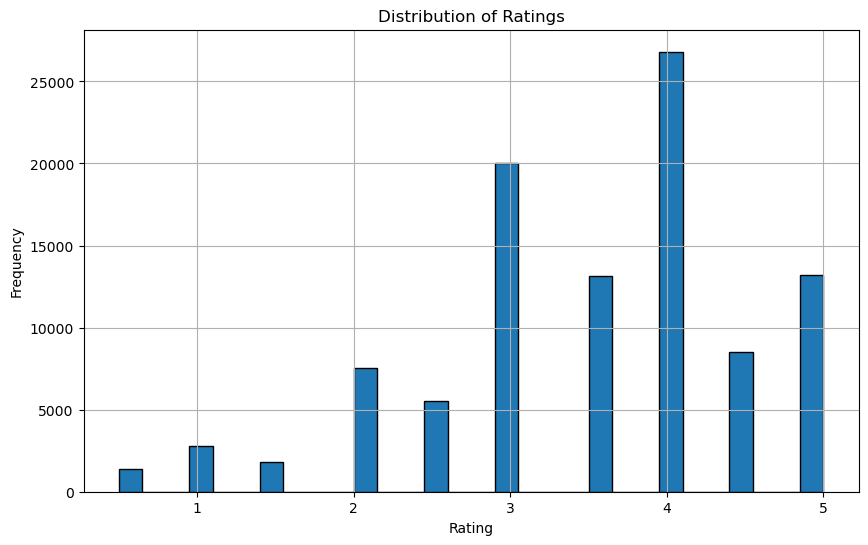

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(merged_df["rating"], bins=30, edgecolor="k")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

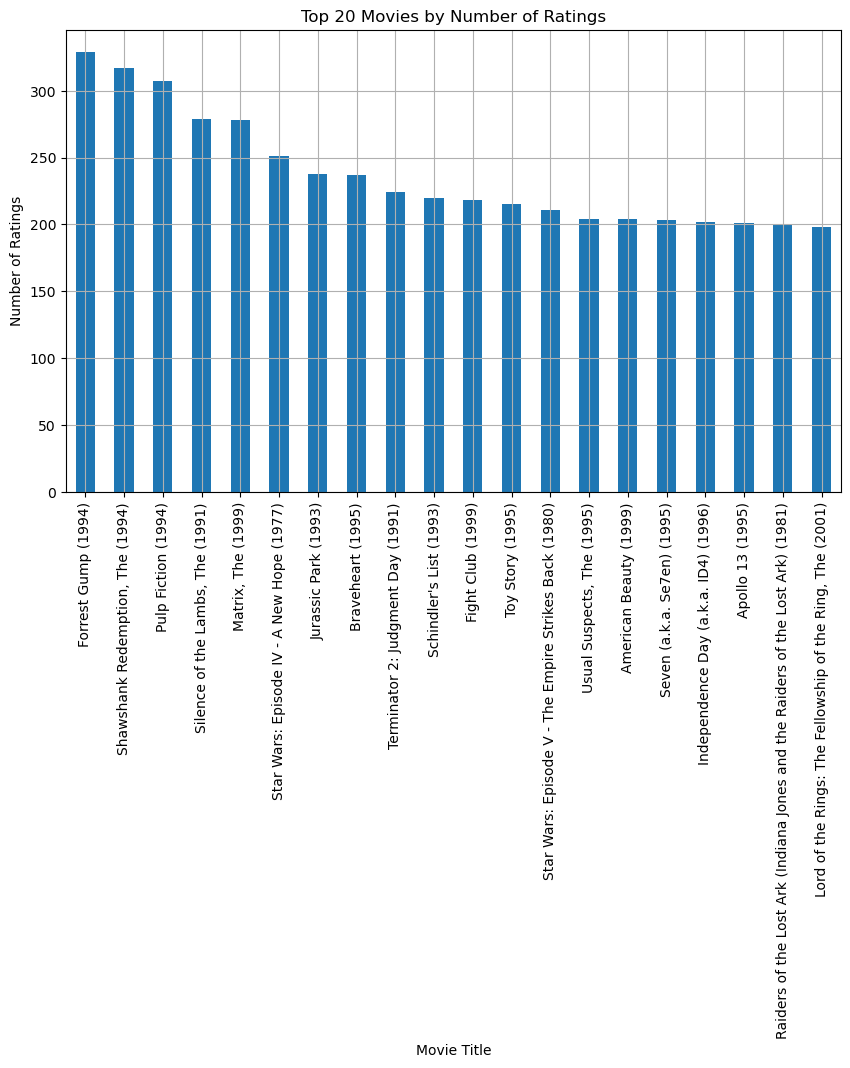

In [20]:
rating_counts = (
    merged_df.groupby("title")["rating"].count().sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
rating_counts.head(20).plot(kind="bar")
plt.title("Top 20 Movies by Number of Ratings")
plt.xlabel("Movie Title")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

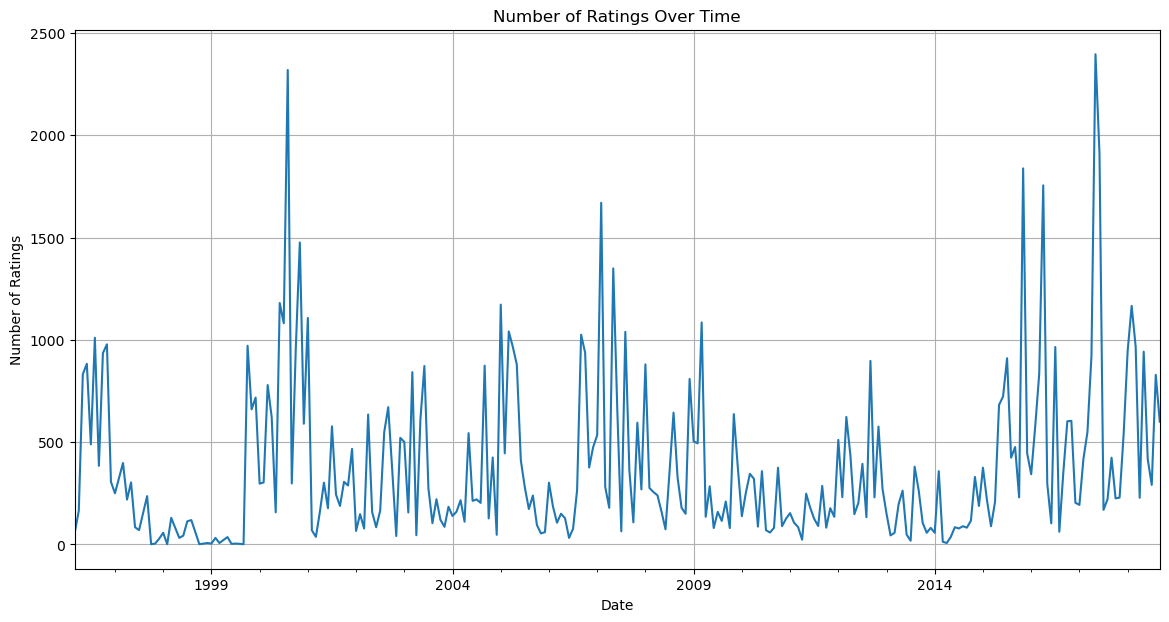

In [21]:
merged_df["timestamp"] = pd.to_datetime(merged_df["timestamp"], unit="s")
merged_df["year_month"] = merged_df["timestamp"].dt.to_period("M")
monthly_ratings_count = merged_df.groupby("year_month")["rating"].count()
plt.figure(figsize=(14, 7))
monthly_ratings_count.plot()
plt.title("Number of Ratings Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Ratings")
plt.grid()
plt.show()

In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100789 entries, 0 to 100788
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   movieId     100789 non-null  int64         
 1   title       100789 non-null  object        
 2   genres      100789 non-null  object        
 3   userId      100789 non-null  int64         
 4   rating      100789 non-null  float64       
 5   timestamp   100789 non-null  datetime64[ns]
 6   year_month  100789 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(2), object(2), period[M](1)
memory usage: 5.4+ MB


In [38]:
user_rating_count = merged_df.groupby("userId")["rating"].count()
usc_df = pd.DataFrame(user_rating_count)
usc_df.rename(columns={"rating": "rating_counts_per_user"}, inplace=True)
usc_df.describe()

,rating_counts_per_user
count,610.000000
mean,165.227869
std,269.308710
min,20.000000
25%,35.000000
50%,70.500000
75%,168.000000
max,2696.000000


/Users/ericwindsor/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

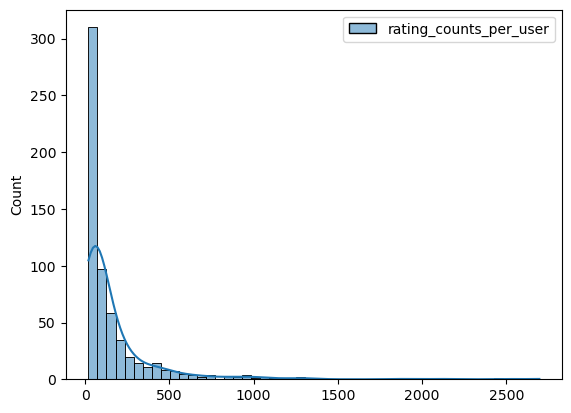

In [45]:
import seaborn as sns

sns.histplot(usc_df, bins=50, kde=True)

In [39]:
movie_rating_count = merged_df.groupby("movieId")["rating"].count()
mvc_df = pd.DataFrame(movie_rating_count)
mvc_df.rename(columns={"rating": "rating_counts_per_movie"}, inplace=True)
mvc_df.describe()

,rating_counts_per_movie
count,9685.000000
mean,10.406711
std,22.439079
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,329.000000


/Users/ericwindsor/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


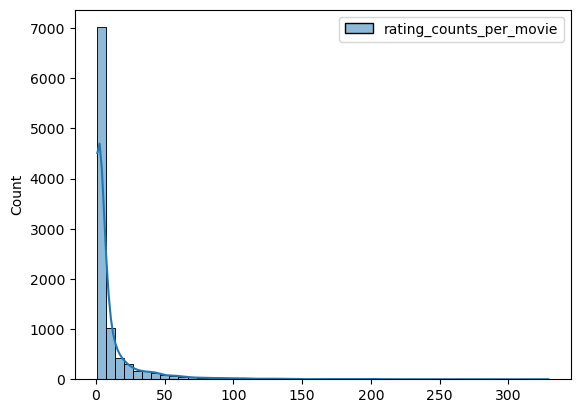

In [47]:
sns.histplot(mvc_df, bins=50, kde=True)
plt.show()